In [1]:
from apts import *
import pandas as pd
%matplotlib inline  

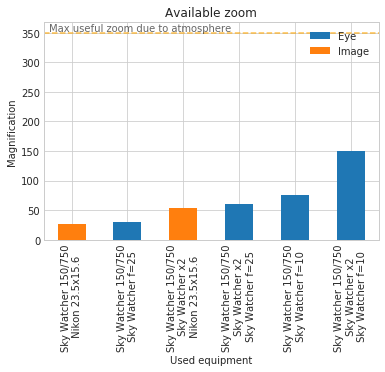

In [2]:
e = Equipment()

sky_watcher = "Sky Watcher"

e.register(equipment.Camera(23.5, 15.6, 6000, 4000, "Nikon"))
e.register(equipment.Telescope(150, 750, sky_watcher, t2_output = True))
e.register(equipment.Barlow(2, sky_watcher, t2_output = True))
#e.register(equipment.Barlow(3, sky_watcher, t2_output = True))
e.register(equipment.Eyepiece(25, sky_watcher))
e.register(equipment.Eyepiece(10, sky_watcher))
#e.register(equipment.Eyepiece(6, sky_watcher))

e.plot_zoom()

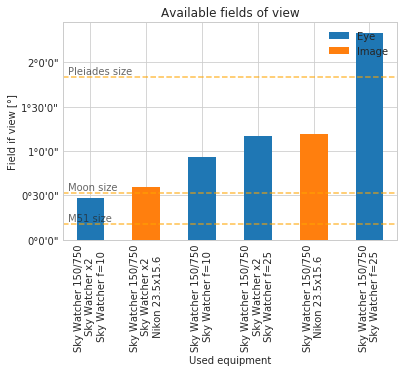

In [3]:
e.plot_fov()

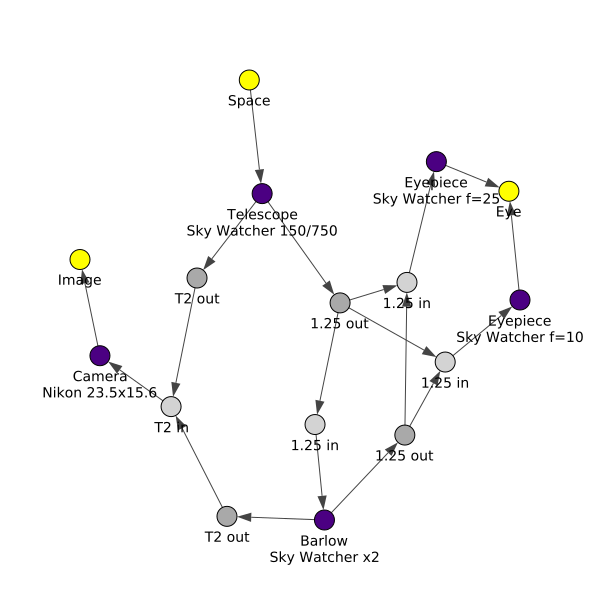

In [4]:
e.plot_connection_graph()

In [5]:
data = e.data()
data[data.Useful== True].sort_values(['Zoom'], ascending=[0])

,ID,Label,Type,Zoom,Useful,FoV,Exit pupil,Dawes' limit,Range,Brightness,Elements
1,1,"Sky Watcher 150/750, Sky Watcher x2, Sky Watcher f=10",Eye,150.00000,True,0.466667,1.0 millimeter,0.773 arcsecond,13.580456,2.040816,3
3,3,"Sky Watcher 150/750, Sky Watcher f=10",Eye,75.00000,True,0.933333,2.0 millimeter,0.773 arcsecond,13.580456,8.163265,2
0,0,"Sky Watcher 150/750, Sky Watcher x2, Sky Watcher f=25",Eye,60.00000,True,1.166667,2.5 millimeter,0.773 arcsecond,13.580456,12.755102,3
4,4,"Sky Watcher 150/750, Sky Watcher x2, Nikon 23.5x15.6",Image,53.17912,True,0.595920,0.0 millimeter,0.773 arcsecond,13.580456,16.236939,3
2,2,"Sky Watcher 150/750, Sky Watcher f=25",Eye,30.00000,True,2.333333,5.0 millimeter,0.773 arcsecond,13.580456,51.020408,2
5,5,"Sky Watcher 150/750, Nikon 23.5x15.6",Image,26.58956,True,1.191840,0.0 millimeter,0.773 arcsecond,13.580456,64.947755,2


In [6]:
place = Place(lat=50.1637973, lon=19.7855169, name="Example place")
o = Observation(place,e)

In [7]:
place.sunset_time()

datetime.datetime(2018, 8, 18, 19, 54, 29, 637135, tzinfo=tzfile('/usr/share/zoneinfo/Europe/Warsaw'))

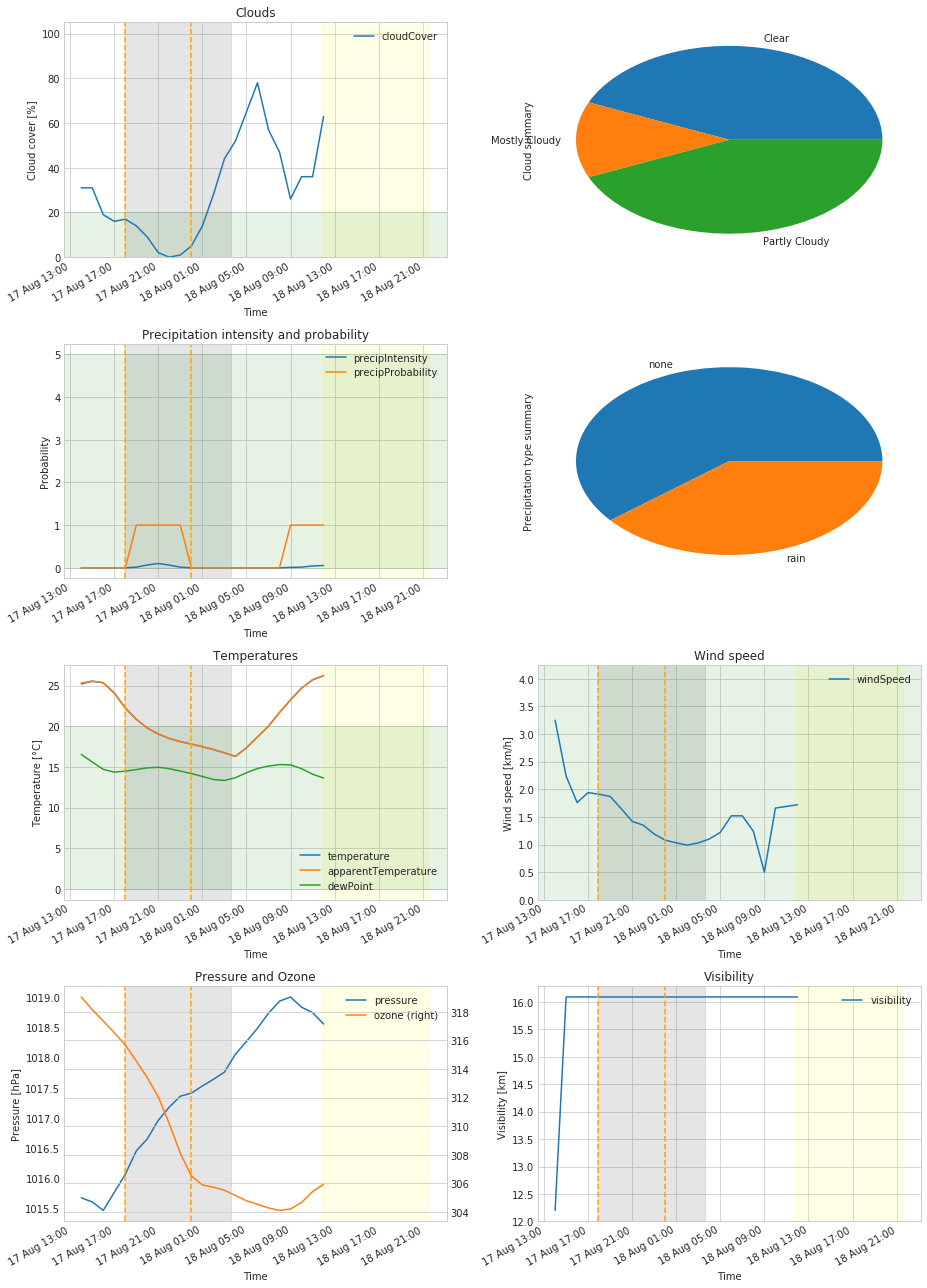

In [8]:
o.plot_weather()

In [9]:
o.is_weather_good()

False

In [10]:
o.place.moon_phase()

41

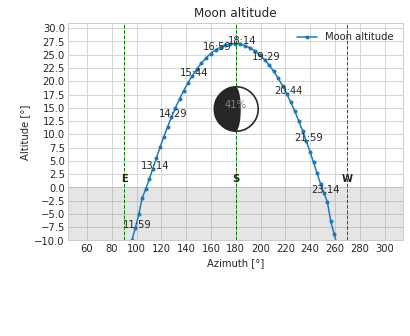

In [11]:
o.place.plot_moon_path()

In [12]:
#n = Notify('lpozarlik@gmail.com')
#n.send(o)

In [13]:
o.local_planets.objects

,Ephem,Name,Transit,Rising,Setting,Altitude,Magnitude,RA,Dec,Distance,Size,Elongation,Phase
0,"<Mercury ""Mercury"" at 0x7f4ed70f9c88>",Mercury,2018-08-18 11:46:47.517335+02:00,2018-08-18 04:32:25.224356+02:00,2018-08-17 19:04:37.290198+02:00,54.357890,1.66,8.879616,14.510320,0.715544,9.419403,-14.143589,13.392812
1,"<Venus ""Venus"" at 0x7f4ed70f9e10>",Venus,2018-08-18 15:32:59.417219+02:00,2018-08-18 09:58:12.804809+02:00,2018-08-17 21:09:34.986273+02:00,33.813657,-4.26,12.659910,-6.046211,0.678056,24.953676,45.923595,48.210629
2,"<Mars ""Mars"" at 0x7f4ed64ef048>",Mars,2018-08-17 23:07:30.908746+02:00,2018-08-17 19:30:09.241376+02:00,2018-08-18 02:44:53.560220+02:00,13.402438,-2.53,20.190356,-26.498822,0.405880,23.060982,153.609406,97.299377
3,"<ephem.Jupiter ""Jupiter"" at 0x7f4ed7797310>",Jupiter,2018-08-18 17:46:22.294769+02:00,2018-08-18 13:01:31.197456+02:00,2018-08-17 22:34:50.949600+02:00,24.243468,-1.85,14.889018,-15.627935,5.471358,35.958168,79.872208,99.137001
4,"<ephem.Saturn ""Saturn"" at 0x7f4ed7797480>",Saturn,2018-08-17 21:08:46.348937+02:00,2018-08-18 17:01:07.496786+02:00,2018-08-18 01:12:22.246866+02:00,17.233588,0.29,18.205893,-22.653716,9.409327,17.599558,128.010361,99.842728
5,"<Uranus ""Uranus"" at 0x7f4ed64ef1d0>",Uranus,2018-08-18 04:57:11.858968+02:00,2018-08-17 21:56:30.436656+02:00,2018-08-18 11:57:52.677317+02:00,51.676036,5.76,2.034354,11.827304,19.466024,3.620719,-112.630707,99.944733
6,"<Neptune ""Neptune"" at 0x7f4ed64ef358>",Neptune,2018-08-18 02:04:15.983968+02:00,2018-08-17 20:33:25.338858+02:00,2018-08-18 07:35:05.264382+02:00,33.281248,7.82,23.144275,-6.579103,28.991213,2.355679,-159.377182,99.996452


In [14]:
o.get_visible_planets()

,Ephem,Name,Transit,Rising,Setting,Altitude,Magnitude,RA,Dec,Distance,Size,Elongation,Phase,ID
4,"<ephem.Saturn ""Saturn"" at 0x7f4ed7797480>",Saturn,2018-08-17 21:08:46.348937+02:00,2018-08-18 17:01:07.496786+02:00,2018-08-18 01:12:22.246866+02:00,17.233588,0.29,18.205893,-22.653716,9.409327,17.599558,128.010361,99.842728,4
2,"<Mars ""Mars"" at 0x7f4ed64ef048>",Mars,2018-08-17 23:07:30.908746+02:00,2018-08-17 19:30:09.241376+02:00,2018-08-18 02:44:53.560220+02:00,13.402438,-2.53,20.190356,-26.498822,0.405880,23.060982,153.609406,97.299377,2
6,"<Neptune ""Neptune"" at 0x7f4ed64ef358>",Neptune,2018-08-18 02:04:15.983968+02:00,2018-08-17 20:33:25.338858+02:00,2018-08-18 07:35:05.264382+02:00,33.281248,7.82,23.144275,-6.579103,28.991213,2.355679,-159.377182,99.996452,6
5,"<Uranus ""Uranus"" at 0x7f4ed64ef1d0>",Uranus,2018-08-18 04:57:11.858968+02:00,2018-08-17 21:56:30.436656+02:00,2018-08-18 11:57:52.677317+02:00,51.676036,5.76,2.034354,11.827304,19.466024,3.620719,-112.630707,99.944733,5
0,"<Mercury ""Mercury"" at 0x7f4ed70f9c88>",Mercury,2018-08-18 11:46:47.517335+02:00,2018-08-18 04:32:25.224356+02:00,2018-08-17 19:04:37.290198+02:00,54.357890,1.66,8.879616,14.510320,0.715544,9.419403,-14.143589,13.392812,0
1,"<Venus ""Venus"" at 0x7f4ed70f9e10>",Venus,2018-08-18 15:32:59.417219+02:00,2018-08-18 09:58:12.804809+02:00,2018-08-17 21:09:34.986273+02:00,33.813657,-4.26,12.659910,-6.046211,0.678056,24.953676,45.923595,48.210629,1
3,"<ephem.Jupiter ""Jupiter"" at 0x7f4ed7797310>",Jupiter,2018-08-18 17:46:22.294769+02:00,2018-08-18 13:01:31.197456+02:00,2018-08-17 22:34:50.949600+02:00,24.243468,-1.85,14.889018,-15.627935,5.471358,35.958168,79.872208,99.137001,3


In [15]:
o.plot_visible_planets()

In [16]:
o.get_visible_messier()

,Messier,Name,NGC,Type,Constellation,Magnitude,Distance,RA,Dec,Width,Height,Transit,Altitude,ID
61,M62,-,NGC 6266,Globular Cluster,Ophiucus,6.5,21500,17.020000,-30.116667,14.1,14.1,2018-08-17 19:58:59.448753+02:00,9.782579,61
18,M19,-,NGC 6273,Globular Cluster,Ophiucus,6.8,27100,17.043333,-26.266667,13.5,13.5,2018-08-17 20:00:21.167013+02:00,13.609354,18
91,M92,-,NGC 6341,Globular Cluster,Hercules,6.4,26400,17.285000,43.133333,11.2,11.2,2018-08-17 20:14:14.682595+02:00,82.958644,91
8,M9,-,NGC 6333,Globular Cluster,Ophiucus,7.7,26700,17.320000,-18.516667,9.3,9.3,2018-08-17 20:16:50.847053+02:00,21.343851,8
13,M14,-,NGC 6402,Globular Cluster,Ophiucus,7.6,27400,17.626667,-3.250000,11.7,11.7,2018-08-17 20:35:05.187317+02:00,36.600781,13
22,M23,-,NGC 6494,Open Cluster,Sagittarius,6.9,2150,17.946667,-19.016667,27.0,27.0,2018-08-17 20:54:21.221515+02:00,20.861688,22
19,M20,Trifid Nebula,NGC 6514,Diffuse Nebula,Sagittarius,9.0,5200,18.038333,-23.033333,28.0,28.0,2018-08-17 20:59:52.335168+02:00,16.857896,19
7,M8,Lagoon Nebula,NGC 6523,Diffuse Nebula,Sagittarius,6.0,5200,18.063333,-24.383333,90.0,40.0,2018-08-17 21:01:22.790826+02:00,15.513270,7
20,M21,-,NGC 6531,Open Cluster,Sagittarius,6.5,4250,18.076667,-22.500000,13.0,13.0,2018-08-17 21:02:09.694937+02:00,17.390609,20
23,M24,Milky Way Patch,NGC 6603,Star Cloud,Sagittarius,4.6,10000,18.306667,-18.416667,90.0,90.0,2018-08-17 21:15:53.454388+02:00,21.470165,23


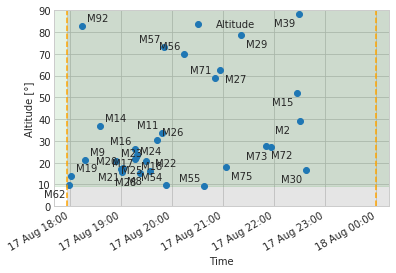

In [17]:
o.plot_messier()

In [18]:
import numpy as np
import time
from datetime import datetime
import ephem
# Always get the latest ISS TLE data from:
# http://spaceflight.nasa.gov/realdata/sightings/SSapplications/Post/JavaSSOP/orbit/ISS/SVPOST.html
iss = ephem.readtle('ISS',
    '1 25544U 98067A   17289.56535255  .00016717  00000-0  10270-3 0  9000',
    '2 25544  51.6389 153.2478 0004983  22.1446 337.9921 15.54200052   623'
)
#while True:
#    o.place.date = datetime.utcnow()
#    iss.compute(o.place)
#    print('iss: altitude %4.1f deg, azimuth %5.1f deg' % (np.degrees(iss.alt), np.degrees(iss.az)))
#    time.sleep(1.0)